In [1]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

source: https://www.kaggle.com/datasets/jessemostipak/broadway-weekly-grosses?select=grosses.csv

In [2]:

df_grosses = pd.read_csv("Data/grosses.csv")


In [91]:
df_grosses = pd.read_csv("Data/grosses.csv")

In [3]:
df_grosses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47524 entries, 0 to 47523
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   week_ending           47524 non-null  object 
 1   week_number           47524 non-null  int64  
 2   weekly_gross_overall  47524 non-null  float64
 3   show                  47524 non-null  object 
 4   theatre               47524 non-null  object 
 5   weekly_gross          47524 non-null  float64
 6   potential_gross       34911 non-null  float64
 7   avg_ticket_price      47524 non-null  float64
 8   top_ticket_price      36167 non-null  float64
 9   seats_sold            47524 non-null  int64  
 10  seats_in_theatre      47524 non-null  int64  
 11  pct_capacity          47524 non-null  float64
 12  performances          47524 non-null  int64  
 13  previews              47524 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 5.1+ MB


In [4]:
df_grosses.sample(3)

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews
33690,2011-06-12,2,21540626.0,Mamma Mia!,Broadhurst Theatre,785948.0,1385392.0,80.50,200.0,9763,1498,0.8147,8,0
5537,1990-10-07,18,4602586.0,A Few Good Men,Music Box Theatre,132186.0,NaN,21.73,NaN,6084,997,0.7628,8,0
25090,2005-11-13,24,17742411.0,The Woman in White,Marquis Theatre,778772.0,1033287.0,65.14,100.0,11955,1557,0.9598,0,8


we will stick to the grosses one, as it is big enough to do the analysis!

### METADATA

- week_ending: Date of the end of the weekly measurement period. Always a Sunday.
- week_number: Week number in the Broadway season. The season starts after the Tony Awards, held in early June. Some seasons have 53 weeks.
- weekly_gross_overall: Weekly box office gross for all shows
- show: Name of show. Some shows have the same name, but multiple runs.
- theatre: Name of theatre
- weekly_gross: Weekly box office gross for individual show
- potential_gross: Weekly box office gross if all seats are sold at full price. Shows can exceed their potential gross by selling premium  tickets and/or standing room tickets.
- avg_ticket_price: Average price of tickets sold
- top_ticket_price: Highest price of tickets sold
- seats_sold: Total seats sold for all performances and previews
- seats_in_theatre: Theatre seat capacity
- pct_capacity: Percent of theatre capacity sold. Shows can exceed 100% capacity by selling standing room tickets.
- performances: Number of performances in the week
- previews: Number of preview performances in the week. Previews occur before a show's official open.

In [5]:
df_grosses.describe()

,week_number,weekly_gross_overall,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews
count,47524.000000,4.752400e+04,4.752400e+04,3.491100e+04,47524.000000,36167.000000,47524.000000,47524.000000,47524.000000,47524.000000,47524.000000
mean,27.372170,1.669303e+07,5.744868e+05,9.395982e+05,67.914736,189.681892,7893.449668,1237.793536,0.802753,7.237754,0.583663
std,15.310139,9.520198e+06,4.433470e+05,4.193233e+05,38.589416,112.304515,3186.019908,358.357398,0.176418,2.229733,1.926202
min,1.000000,2.474396e+06,0.000000e+00,7.754000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,9.093031e+06,2.622292e+05,6.295230e+05,43.370000,85.000000,5442.000000,1021.000000,0.691400,8.000000,0.000000
50%,28.000000,1.506067e+07,4.700645e+05,9.031500e+05,60.235000,200.000000,7736.000000,1181.000000,0.833000,8.000000,0.000000
75%,41.000000,2.289759e+07,7.584381e+05,1.190502e+06,84.652500,250.000000,10187.000000,1509.000000,0.953800,8.000000,0.000000
max,53.000000,5.780727e+07,4.041493e+06,3.559306e+06,511.580000,998.000000,24305.000000,1969.000000,1.553600,17.000000,16.000000


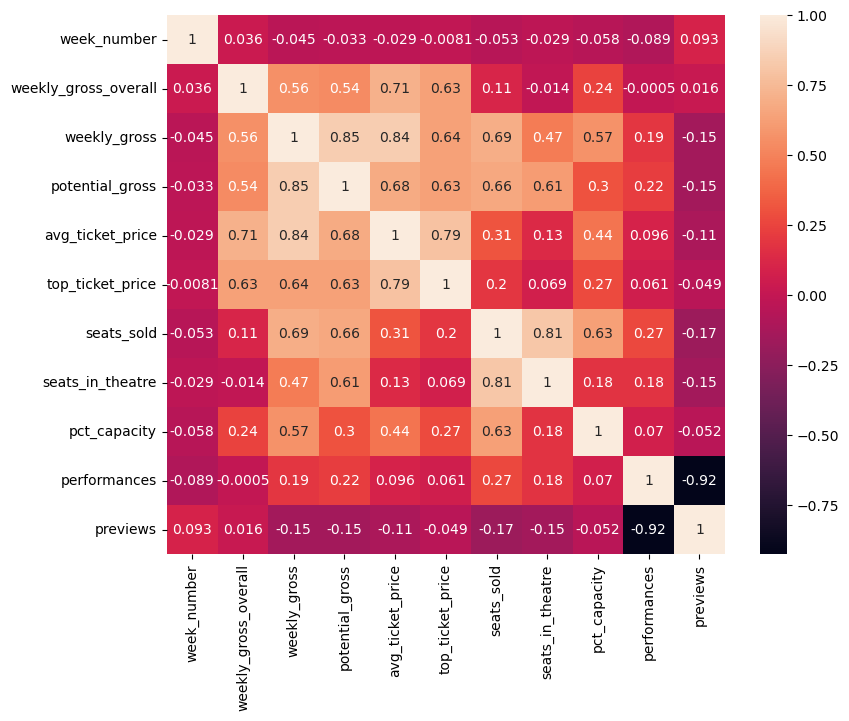

In [6]:
data_corr =df_grosses.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#at a first glance we can see there is a strong correlation between performances and previews!

In [7]:
print(df_grosses.previews.value_counts())
print(df_grosses.performances.value_counts())

previews
0     42998
8      1962
7       811
3       465
4       407
5       242
6       240
2       235
1       158
9         3
16        1
10        1
11        1
Name: count, dtype: int64
performances
8     39886
0      3556
7      1554
6       598
5       565
9       436
1       334
4       302
10       97
2        87
11       51
3        35
12       11
15        5
16        3
13        2
14        1
17        1
Name: count, dtype: int64


In [8]:
import datetime

In [9]:
time_series=df_grosses

In [10]:
time_series['week_ending2']=pd.to_datetime(time_series.week_ending)

In [11]:
time_series.sort_values('week_ending2', inplace=True)

In [12]:
time_series.reset_index(drop=True, inplace=True)

In [13]:
time_series.head()

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,week_ending2
0,1985-06-09,1,3915937.0,42nd Street,St. James Theatre,282368.0,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985-06-09
1,1985-06-09,1,3915937.0,The Tap Dance Kid,Minskoff Theatre,178556.0,NaN,26.78,NaN,6667,1621,0.5141,8,0,1985-06-09
2,1985-06-09,1,3915937.0,The Odd Couple,Broadhurst Theatre,91056.0,NaN,24.17,NaN,3768,1181,0.3988,0,8,1985-06-09
3,1985-06-09,1,3915937.0,The King and I,Broadway Theatre,407169.0,NaN,40.84,NaN,9969,1765,0.7060,8,0,1985-06-09
4,1985-06-09,1,3915937.0,Sunday in the Park with George,Booth Theatre,153364.0,NaN,31.43,NaN,4880,771,0.7912,8,0,1985-06-09


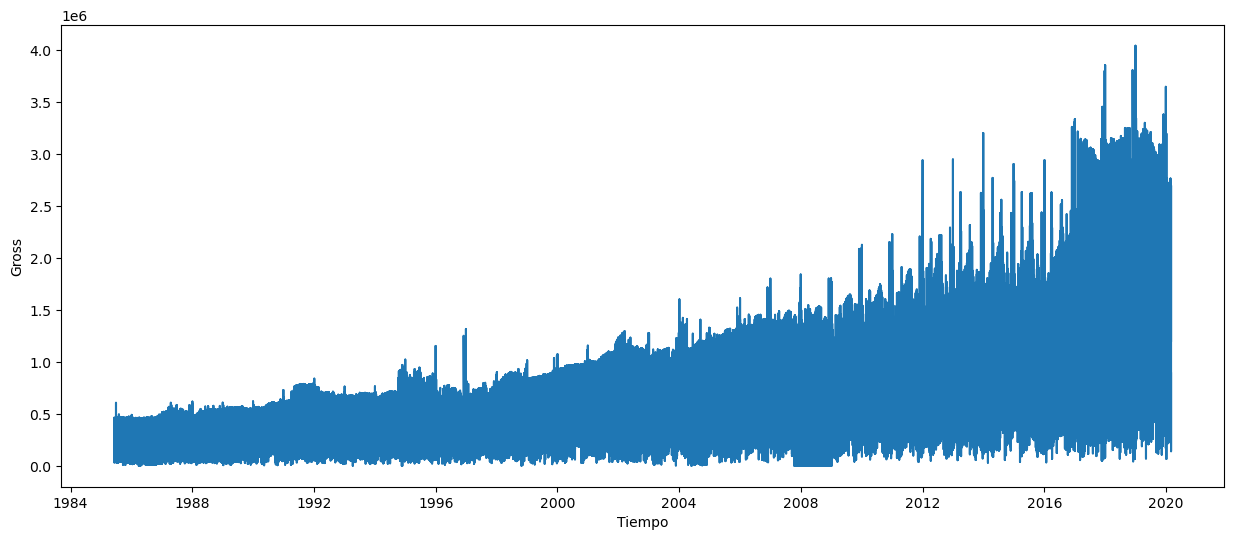

In [14]:
plt.figure(figsize=(15,6))
plt.plot(time_series.week_ending2, time_series.weekly_gross)
plt.xlabel('Tiempo')
plt.ylabel('Gross')
plt.show()

In [15]:
semanal=time_series.resample('W', on='week_ending2').sum()
semanal.drop(columns = ['week_number', 'weekly_gross_overall', 'show', 'theatre', 'week_ending', 'potential_gross', 'avg_ticket_price', 'top_ticket_price', 'seats_sold', 'seats_in_theatre', 'pct_capacity', 'performances', 'previews'], inplace=True)
print(semanal.shape)
semanal.head()

(1813, 1)


,weekly_gross
week_ending2,
1985-06-09,3915937.0
1985-06-16,3685742.0
1985-06-23,3690242.0
1985-06-30,3986642.0
1985-07-07,2929052.0


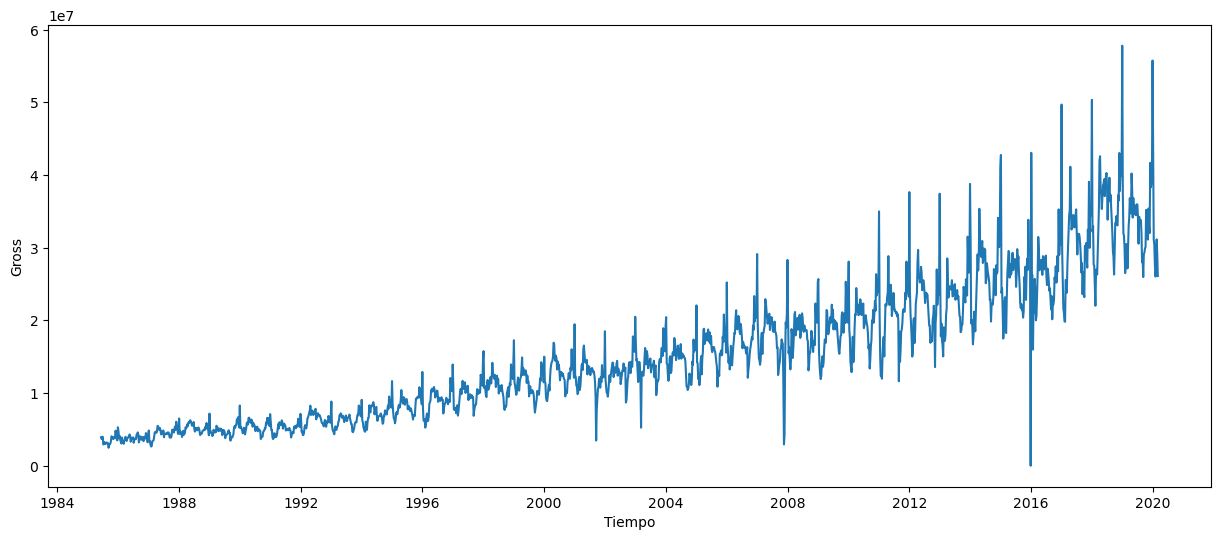

In [16]:
plt.figure(figsize=(15,6))
plt.plot(semanal.index, semanal.weekly_gross)
plt.xlabel('Tiempo')
plt.ylabel('Gross')
plt.show()

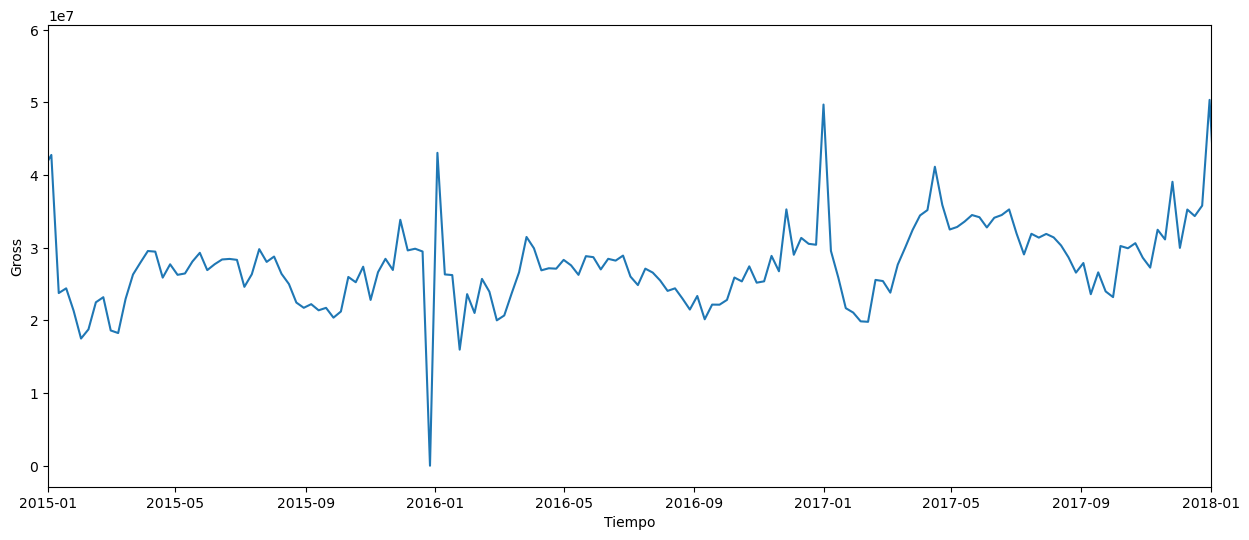

In [17]:
plt.figure(figsize=(15,6))
plt.plot(semanal.index, semanal.weekly_gross)
plt.xlim(datetime.date(2015,1,1),datetime.date(2018,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Gross')
plt.show() #no data was collected on June 16 first week! what happened! no gross revenue?

In [18]:
mensual=time_series.resample('M', on='week_ending2').sum()
mensual.drop(columns = ['week_number', 'weekly_gross_overall', 'show', 'theatre', 'week_ending', 'potential_gross', 'avg_ticket_price', 'top_ticket_price', 'seats_sold', 'seats_in_theatre', 'pct_capacity', 'performances', 'previews'], inplace=True)
print(mensual.shape)
mensual.sample()

(418, 1)


,weekly_gross
week_ending2,
1994-10-31,36539485.0


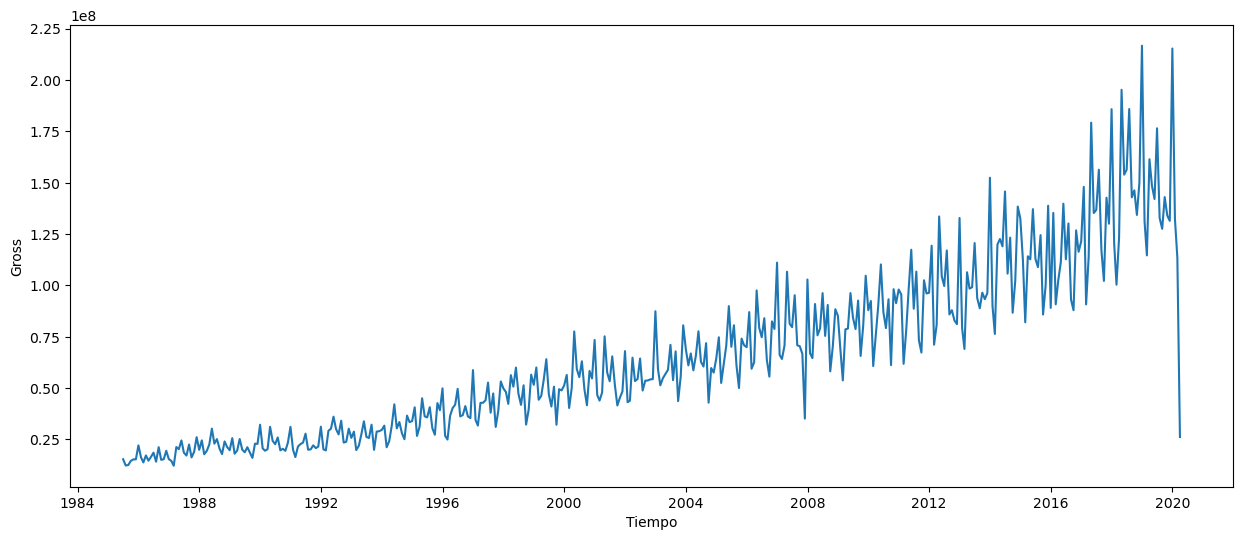

In [19]:
plt.figure(figsize=(15,6))
plt.plot(mensual.index, mensual.weekly_gross)
plt.xlabel('Tiempo')
plt.ylabel('Gross')
plt.show()

Rolling Window

In [20]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1813 entries, 1985-06-09 to 2020-03-01
Freq: W-SUN
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekly_gross  1813 non-null   float64
dtypes: float64(1)
memory usage: 28.3 KB


In [21]:
semanal_promedio = semanal.rolling(5, win_type='triang', center=True).mean()
mensual_promedio = mensual.rolling(2, win_type='triang', center=True).mean()

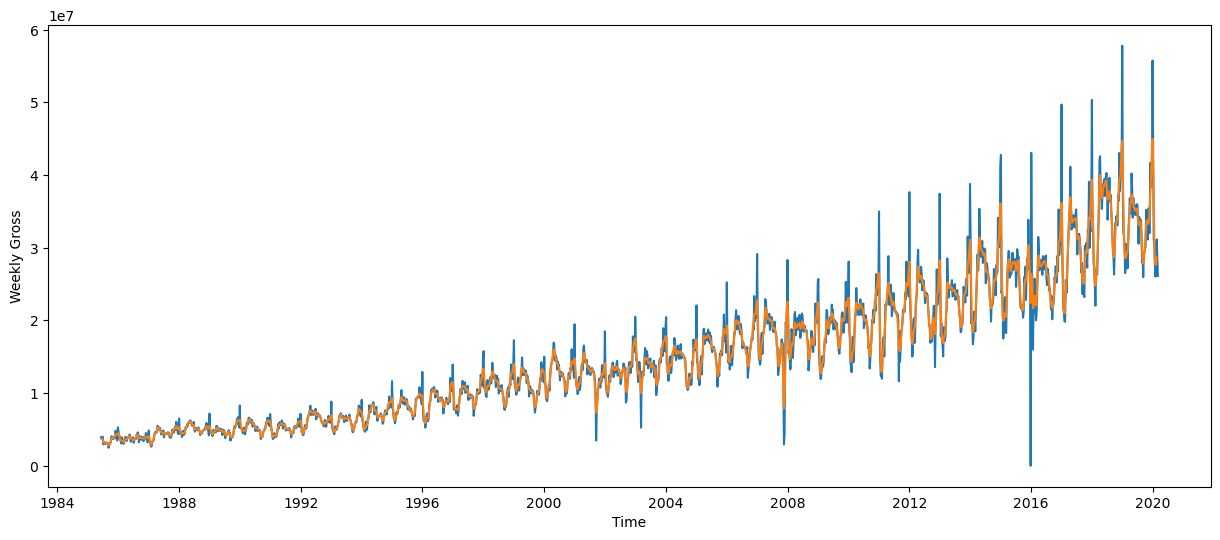

In [22]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.weekly_gross, label = 'Semanal')
plt.plot(semanal_promedio.index, semanal_promedio.weekly_gross, label = 'Semanal Promedio')
# plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Semanal')
# plt.plot(semanal_promedio.index, semanal_promedio.cantidad_pasos, label = 'Semanal Promedio')
#plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.xlabel('Time')
plt.ylabel('Weekly Gross')
plt.show()

#semanal en azul y semanal promedio en naranja. Vemos que el naranja queda más suavizado. A más grande la ventana, más chato.

In [23]:
from prophet import Prophet
import cmdstanpy

In [24]:
semanal.head()

,weekly_gross
week_ending2,
1985-06-09,3915937.0
1985-06-16,3685742.0
1985-06-23,3690242.0
1985-06-30,3986642.0
1985-07-07,2929052.0


In [25]:
df=semanal.reset_index()
df.rename(columns={'week_ending2':'ds', 'weekly_gross':'y'}, inplace=True)
df.head()


,ds,y
0,1985-06-09,3915937.0
1,1985-06-16,3685742.0
2,1985-06-23,3690242.0
3,1985-06-30,3986642.0
4,1985-07-07,2929052.0


In [26]:
df.tail()

,ds,y
1808,2020-02-02,26036075.42
1809,2020-02-09,26971364.47
1810,2020-02-16,31152553.11
1811,2020-02-23,29195909.75
1812,2020-03-01,26109896.25


In [27]:
m=Prophet()
m.fit(df)

14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future=m.make_future_dataframe(periods=730)
future.tail()

,ds
2538,2022-02-25
2539,2022-02-26
2540,2022-02-27
2541,2022-02-28
2542,2022-03-01


In [49]:
forecast=m.predict(future)

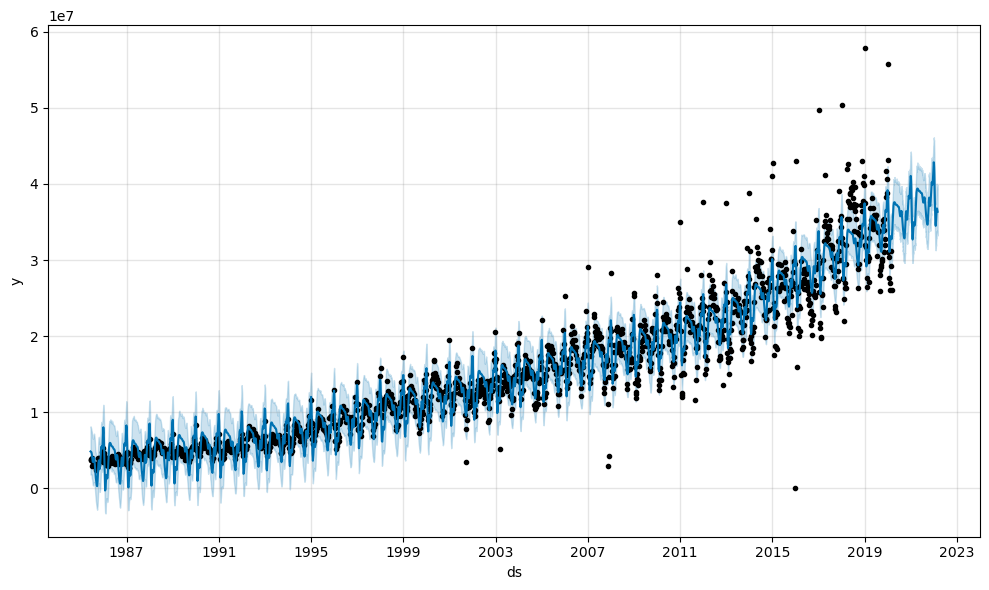

In [50]:
fig1=m.plot(forecast)

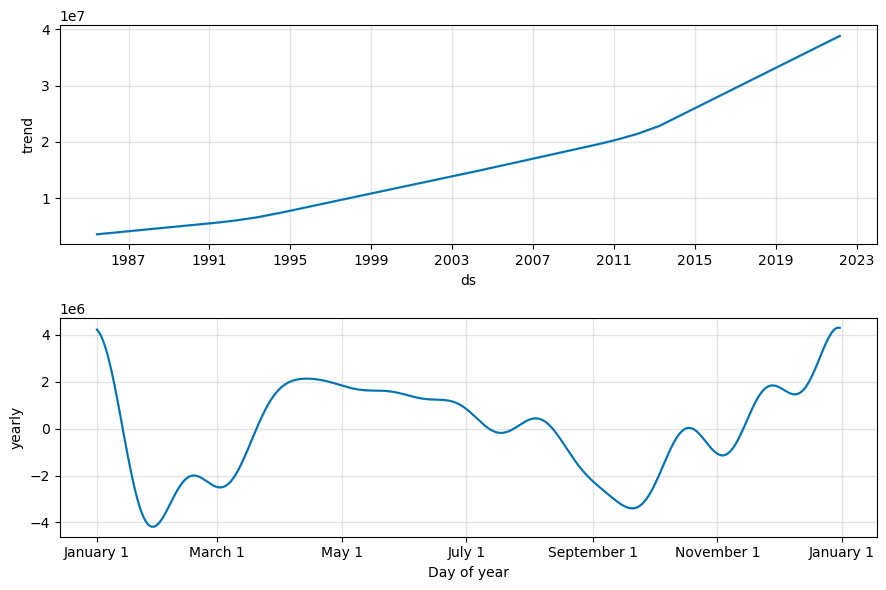

In [51]:
fig2=m.plot_components(forecast)